In [14]:
import os

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling1D, Conv1D, Flatten
from tensorflow.keras import regularizers

import raw_data_loader as data_loader

import model_runner

In [2]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
edfs_path = "../../../dataverse_files"
save_path = '../../../Results/CNN'

In [4]:
signal_segment_len = 5.0
data_split_ratio = 0.2
seed=1337

learning_rate = 0.001
epochs_n = 150
patience = 15
batch_size = 32
validation_split = 0.2

input_shape=None

### Loading data from edf files, segmenting and splitting to train and test datasets

In [5]:
X_train, X_test, y_train, y_test = data_loader.load_and_split_data(edfs_path, signal_segment_len, data_split_ratio, seed)

Not setting metadata
5771 matching events found
No baseline correction applied
0 bad epochs dropped

Epochs number per patient:  [185, 182, 182, 185, 189, 186, 182, 182, 181, 223, 183, 180, 193, 173, 169, 229, 192, 241, 178, 148, 269, 182, 237, 170, 272, 217, 227, 434]

negative:  3165
positive:  2606

X_train shape: (4616, 1250, 19)
X_test shape: (1155, 1250, 19)

input shape: (1250, 19)


In [6]:
input_shape = data_loader.input_shape
input_shape

(1250, 19)

## Models

### CNN

In [17]:
from tensorflow.keras import layers

def build_model_CNN1d(input_shape, opt):    
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'CNN1d_dropout'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 150
Model: "CNN1d_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1248, 64)          3712      
                                                                 
 dropout_2 (Dropout)         (None, 1248, 64)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1246, 64)          12352     
                                                                 
 dropout_3 (Dropout)         (None, 1246, 64)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 623, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 39872)             0         
     

116/116 [==============================] - 3s 27ms/step - loss: 0.0359 - accuracy: 0.9902 - val_loss: 0.1581 - val_accuracy: 0.9762
Epoch 46/150
116/116 [==============================] - 4s 31ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.1760 - val_accuracy: 0.9794
Epoch 47/150
116/116 [==============================] - 6s 49ms/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.3023 - val_accuracy: 0.9459
Epoch 48/150
116/116 [==============================] - 6s 50ms/step - loss: 0.0884 - accuracy: 0.9843 - val_loss: 0.1369 - val_accuracy: 0.9708
Epoch 49/150
116/116 [==============================] - 6s 54ms/step - loss: 0.0390 - accuracy: 0.9892 - val_loss: 0.2246 - val_accuracy: 0.9729
Epoch 50/150
116/116 [==============================] - 6s 55ms/step - loss: 0.0559 - accuracy: 0.9878 - val_loss: 0.3785 - val_accuracy: 0.8853
Epoch 51/150
116/116 [==============================] - 6s 54ms/step - loss: 0.0511 - accuracy: 0.9813 - val_loss: 0.3460 - val_accuracy: 0.929

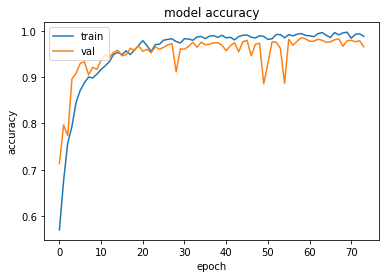

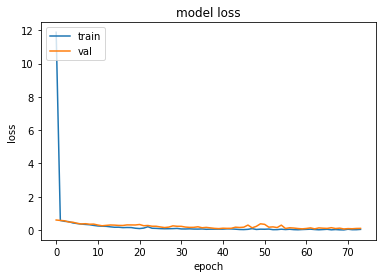

Test Accuracy: 0.9861471861471861
F1 score: 0.9872611464968153


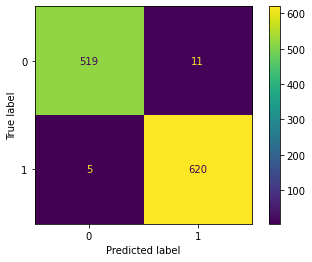

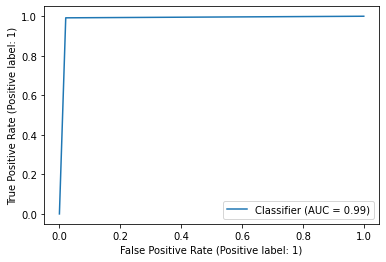

In [18]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_CNN1d, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

### Dropout

In [ ]:
from tensorflow.keras import layers

def build_model_SimpleRNN128_Drop05_Dense32_Drop04(input_shape, opt):    
    model = Sequential()
    
    model.add(SimpleRNN(128,input_shape=input_shape))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'SimpleRNN128_Drop05_Dense32_Drop04'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

In [ ]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_SimpleRNN128_Drop05_Dense32_Drop04, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)